# Ujian Praktek Data Science
## Reyhan Devara
## Kelas : Ewako

# IPM (Indeks Pembangunan Manusia)
Indeks Pembangunan Manusia (IPM) merupakan pengukuran perbandingan dari harapan hidup, pendidikan, dan standar hidup untuk semua negara. IPM digunakan sebagai indikator untuk menilai aspek kualitas dari pembangunan dan untuk mengklasifikasikan apakah sebuah negara termasuk negara maju, negara berkembang, atau negara terbelakang dan juga untuk mengukur pengaruh dari kebijakan ekonomi terhadap kualitas hidup.

## Manfaat dari IPM:
1. Mengukur keberhasilan dalam upaya membangun kualitas hidup manusia (masyarakat/penduduk),
2. Menentukan peringkat atau level pembangunan suatu wilayah/negara, dan
3. Bagi Indonesia, IPM merupakan data strategis karena selain sebagai ukuran kinerja Pemerintah, IPM juga digunakan sebagai salah satu alokator penentuan Dana Alokasi Umum (DAU).

# Program

## Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report




import warnings
warnings.filterwarnings('ignore')

Library diatas merupakan library yang diperlukan agar program machine learning dapat berjalan. Library yang digunakan adalah numpy untuk perhitungan matematika, pandas untuk dataframe, matplotlib dan seaborn untuk visualisasi data, dan sklearn sebagai library machine learning yang powerful.

# Data Acquisition

## Baca dataset

In [2]:
dataset = pd.read_csv('IPM.csv')

Digunakan datase IPM yang didapat dari LMS Orbit Future Academy. Dataset IPM.csv dibaca dan disimpan pada variabel "dataset"

# Data Exploration

## 5 data teratas

In [3]:
dataset.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal


Membaca 5 data teratas

## 5 data terbawah

In [4]:
dataset.tail()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High
2195,12.91,11059,8.17,71.20,High


Membaca 5 data terbawah

## Melihat ukuran data

In [5]:
dataset.shape

(2196, 5)

Terdapat 2196 baris dan 5 kolom. Hal ini menandakan terdapat 2196 data pada setiap Atribut

## Check missing values

In [6]:
dataset.isna().sum()

Harapan_Lama_Sekolah     0
Pengeluaran_Perkapita    0
Rerata_Lama_Sekolah      0
Usia_Harapan_Hidup       0
IPM                      0
dtype: int64

Tidak terdapat atribut yang tidak memiliki value

## Check data double

In [7]:
dataset.duplicated().sum()

0

Tidak terdapat data yang double

## Mengetahui informasi dataset

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


Melihat info dari dataset yang digunakan. Pada kolom terdapat beberapa tipe-tipe data. Pada hal ini, IPM yang akan menjadi dependent variable masih bertipe data object, maka dari itu, kita ubah menjadi tipe data integer

## Mapping IPM ke number

In [9]:
dataset['IPM'] = dataset['IPM'].map({'Low' :0, 'Normal' :1, 'High' :2, 'Very-High' : 3}).astype(int)

Untuk mengubah kolom IPM menjadi integer, kita lakukan <br>maping pada value kolom tersebut. Maka kita mapping kolom tersebut yang awalnya string menjadi integer atau angka. 

In [10]:
dataset.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,2
1,13.90,7148,9.48,65.28,1
2,14.32,8776,8.68,67.43,1
3,14.60,8180,8.88,64.40,1
4,14.01,8030,9.67,68.22,1


Melihat 5 data teratas

In [11]:
dataset.tail()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
2191,10.13,5522,4.91,65.32,0
2192,7.11,5440,2.51,65.26,0
2193,9.79,4761,2.99,64.83,0
2194,14.99,14922,11.30,70.15,2
2195,12.91,11059,8.17,71.20,2


Melihat 5 data terbawah

In [12]:
dataset.describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
count,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000
mean,12.931498,10323.144353,8.291585,69.467418,1.468124
std,1.312967,2664.738311,1.611256,3.437536,0.683275
min,2.950000,3975.000000,0.850000,54.820000,0.000000
25%,12.350000,8599.750000,7.390000,67.210000,1.000000
50%,12.860000,10192.500000,8.180000,69.785000,1.000000
75%,13.570000,11670.500000,9.180000,71.712500,2.000000
max,17.800000,23888.000000,12.830000,77.730000,3.000000


Mendeskripsikan pemusatan dan penyebaran dari data

In [13]:
dataset.nunique()

Harapan_Lama_Sekolah      499
Pengeluaran_Perkapita    1930
Rerata_Lama_Sekolah       633
Usia_Harapan_Hidup       1054
IPM                         4
dtype: int64

Mengecek ke unikan data. Pada hasil yang didapatkan, <br>
variabel IPM merupakan data kategorik, dan variabel sisanya merupakan numerik

# Exploratory Data Analysis

## Plot IPM

Keterangan :
0 = Low
1 = Normal
2 = High
3 = Very-High


1    1128
2     829
3     146
0      93
Name: IPM, dtype: int64

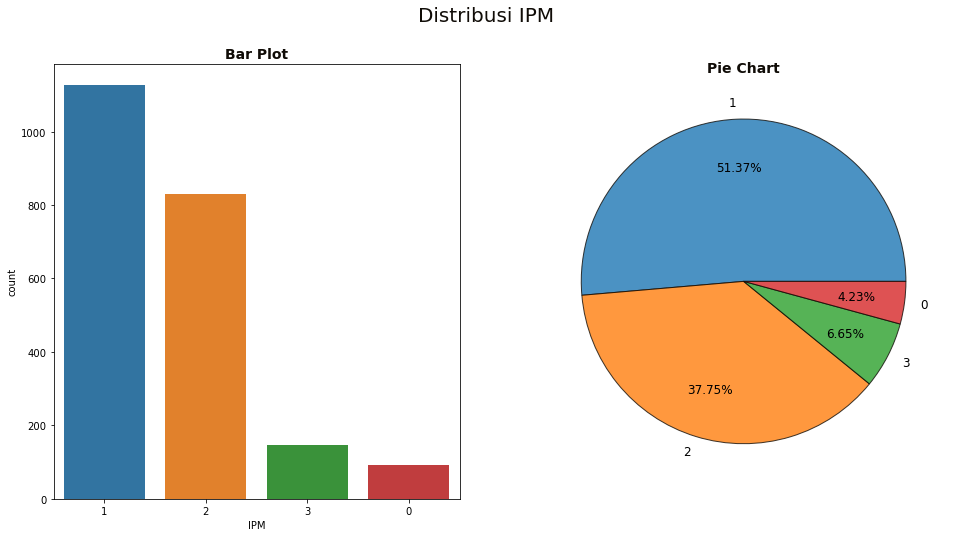

In [14]:
plt.figure(figsize=(16, 8))
plt.suptitle('Distribusi IPM',fontsize='20', color='#100C07')
labels=['1', '2', '3', '0']

plt.subplot(1, 2, 1)
plt.title('Bar Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color='#100C07')
sns.countplot(x = 'IPM', data = dataset, order = dataset['IPM'].value_counts().index)

plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color='#100C07')
plt.pie(dataset['IPM'].value_counts(), labels=labels, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor='#100C07'),
        textprops={'fontsize':12})

print('Keterangan :\n0 = Low\n1 = Normal\n2 = High\n3 = Very-High')
dataset.IPM.value_counts(dropna=False)

Keterangan :<br>
0 = Low <br>
1 = Normal <br>
2 = High <br>
3 = Very-High <br>

IPM Normal memiliki jumlah terbanyak dibandingkan dengan IPM High, disusul dengan IPM Very-High dan IPM Low.

In [15]:
dataset['IPM'].value_counts()

1    1128
2     829
3     146
0      93
Name: IPM, dtype: int64

Banyaknya data pada setiap IPM

## Distribusi Data

<AxesSubplot:title={'center':'Box Plot'}, xlabel='Harapan_Lama_Sekolah'>

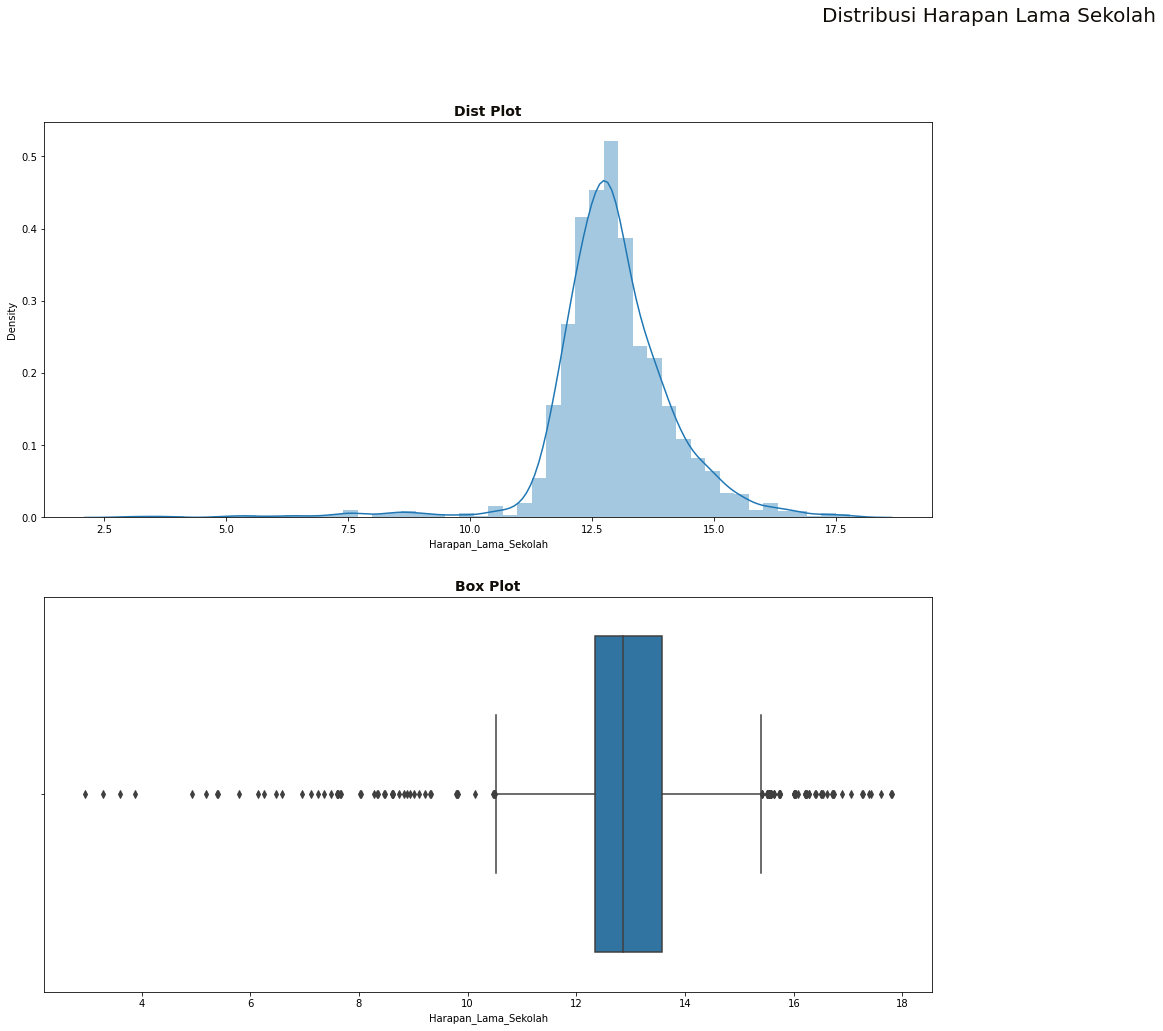

In [16]:
plt.figure(figsize=(35, 16))
plt.suptitle('Distribusi Harapan Lama Sekolah',fontsize='20', color='#100C07')

plt.subplot(2, 2, 1)
plt.title('Dist Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color='#100C07')
sns.distplot(dataset['Harapan_Lama_Sekolah'])

plt.subplot(2, 2, 3)
plt.title('Box Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color='#100C07')
sns.boxplot(dataset['Harapan_Lama_Sekolah'])

<AxesSubplot:title={'center':'Box Plot'}, xlabel='Pengeluaran_Perkapita'>

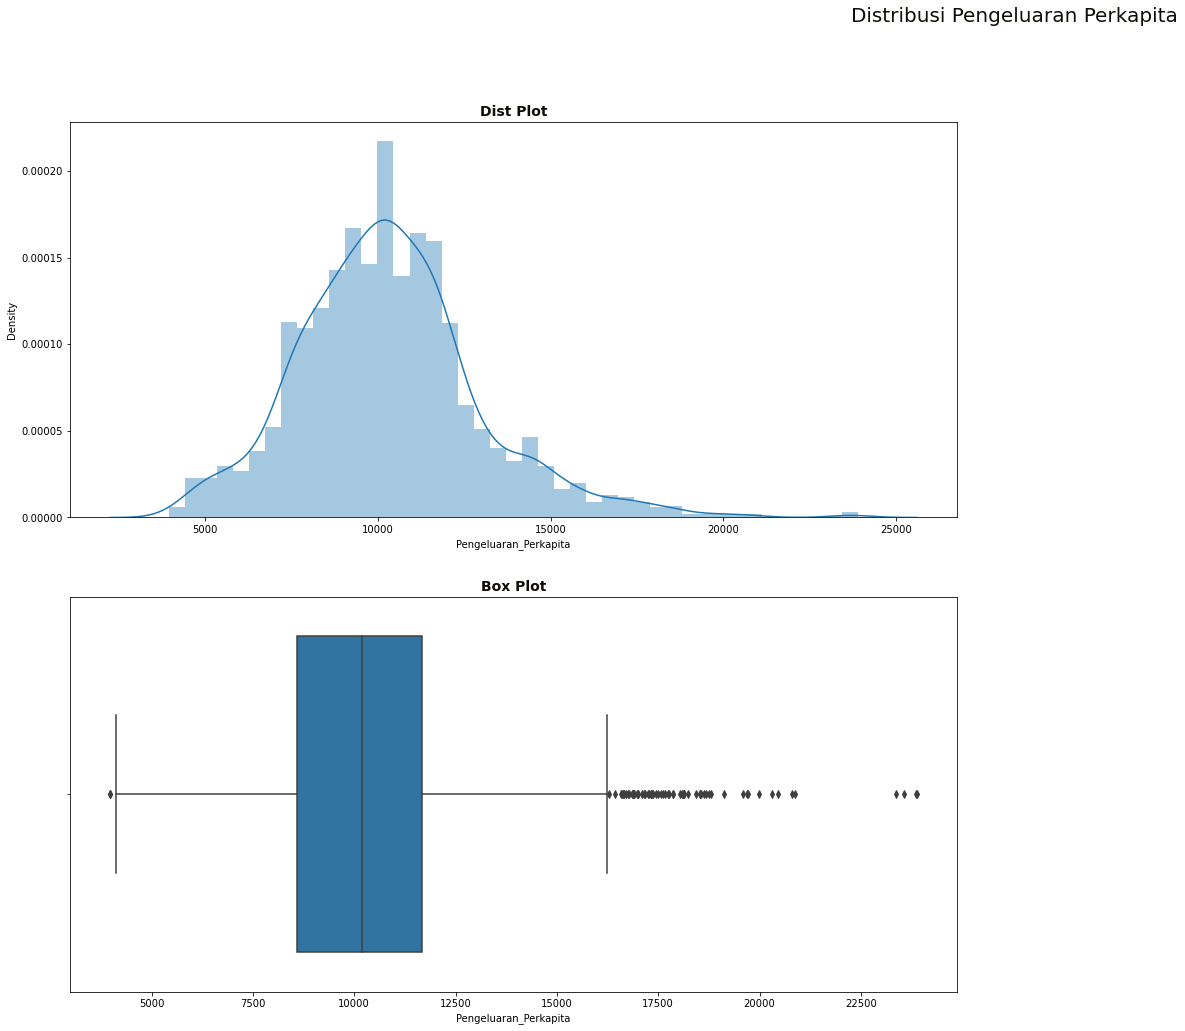

In [17]:
plt.figure(figsize=(35, 16))
plt.suptitle('Distribusi Pengeluaran Perkapita',fontsize='20', color='#100C07')

plt.subplot(2, 2, 1)
plt.title('Dist Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color='#100C07')
sns.distplot(dataset['Pengeluaran_Perkapita'])

plt.subplot(2, 2, 3)
plt.title('Box Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color='#100C07')
sns.boxplot(dataset['Pengeluaran_Perkapita'])

<AxesSubplot:title={'center':'Box Plot'}, xlabel='Rerata_Lama_Sekolah'>

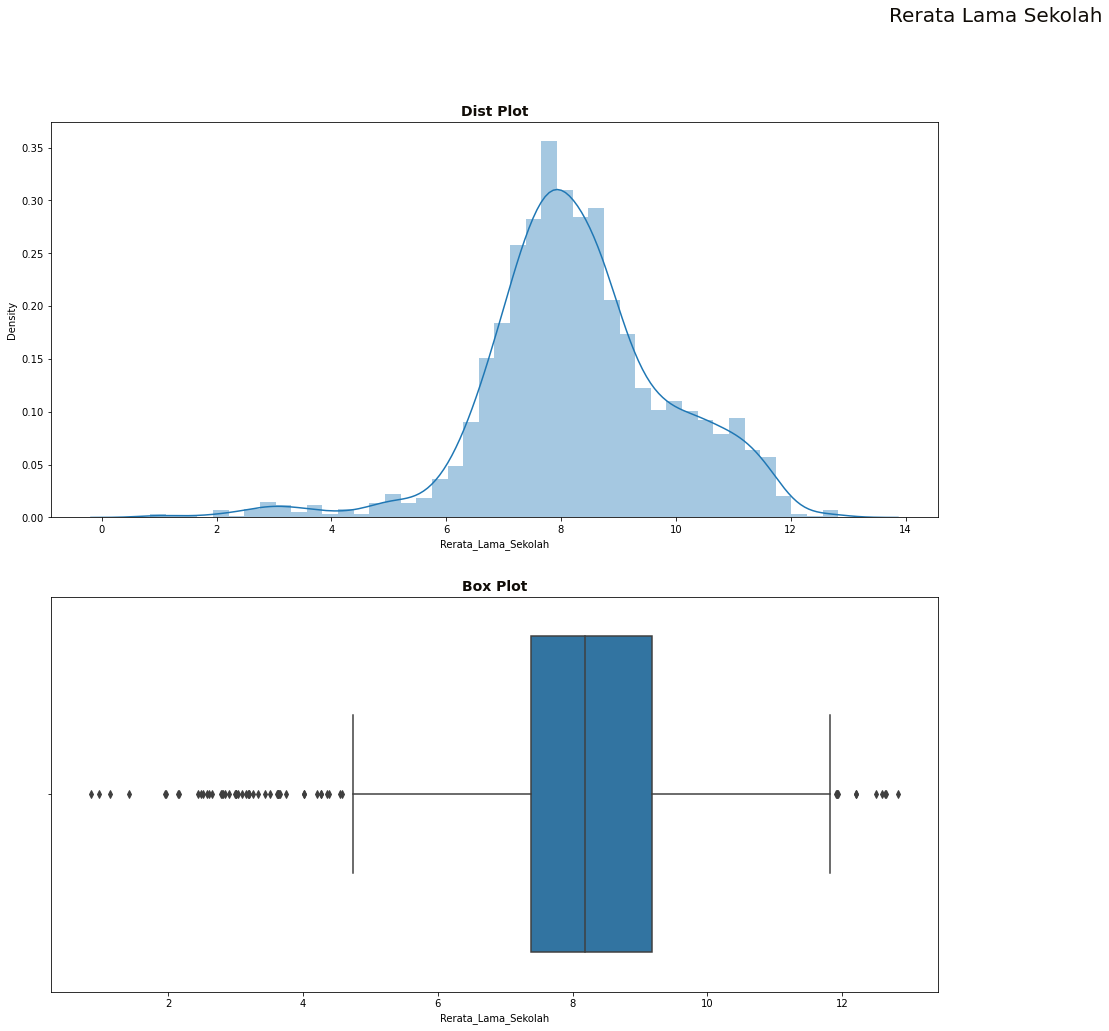

In [18]:
plt.figure(figsize=(35, 16))
plt.suptitle('Rerata Lama Sekolah',fontsize='20', color='#100C07')

plt.subplot(2, 2, 1)
plt.title('Dist Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color='#100C07')
sns.distplot(dataset['Rerata_Lama_Sekolah'])

plt.subplot(2, 2, 3)
plt.title('Box Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color='#100C07')
sns.boxplot(dataset['Rerata_Lama_Sekolah'])

<AxesSubplot:title={'center':'Box Plot'}, xlabel='Usia_Harapan_Hidup'>

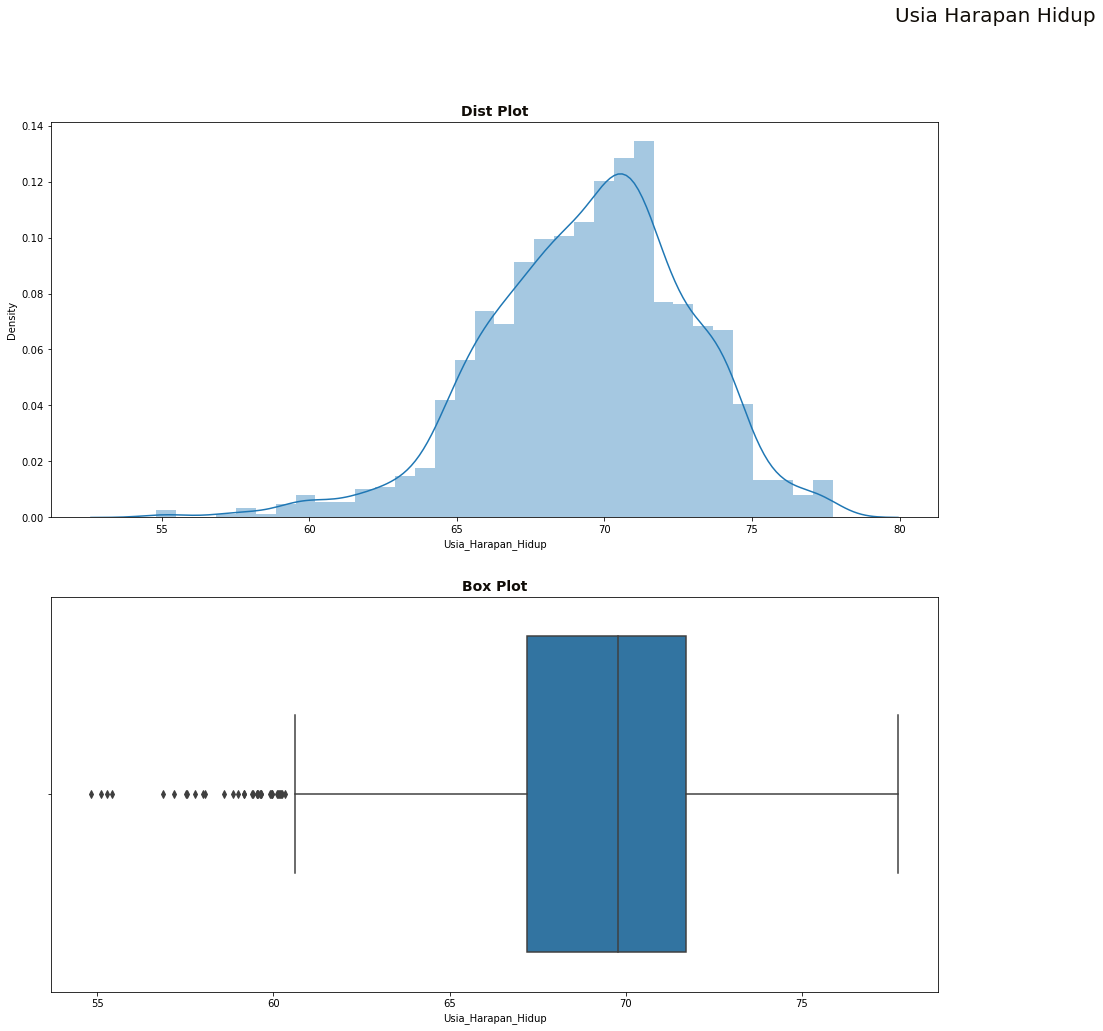

In [19]:
plt.figure(figsize=(35, 16))
plt.suptitle('Usia Harapan Hidup',fontsize='20', color='#100C07')

plt.subplot(2, 2, 1)
plt.title('Dist Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color='#100C07')
sns.distplot(dataset['Usia_Harapan_Hidup'])

plt.subplot(2, 2, 3)
plt.title('Box Plot', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color='#100C07')
sns.boxplot(dataset['Usia_Harapan_Hidup'])

Pada persebaran data pada 4 data numerik, didapatkan bahwa data memiliki beberapa outlier yang normal dan juga outlier yang ekstrim. Mahasiswa tidak menghilangkan outlier tersebut karena ingin menguji model yang kuat dan tahan terhadap outlier.

## Korelasi

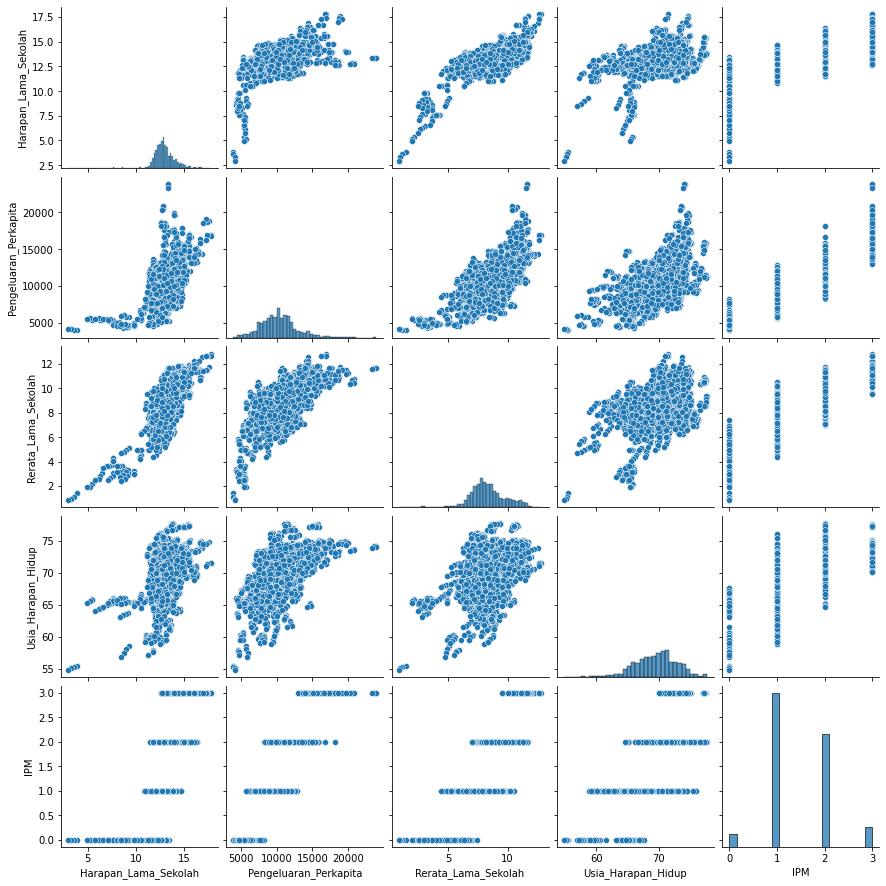

In [20]:
sns.pairplot(dataset)

<AxesSubplot:>

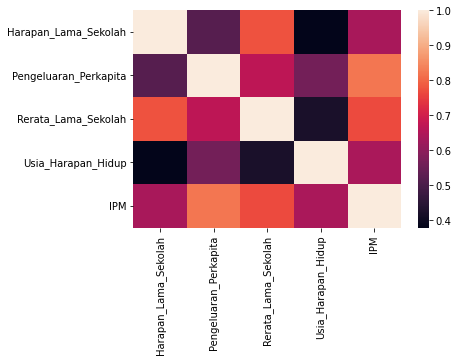

In [21]:
sns.heatmap(dataset.corr())

In [22]:
dataset.corr().style.background_gradient().set_precision(2)

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
Harapan_Lama_Sekolah,1.00,0.52,0.77,0.38,0.64
Pengeluaran_Perkapita,0.52,1.00,0.67,0.56,0.82
Rerata_Lama_Sekolah,0.77,0.67,1.00,0.42,0.77
Usia_Harapan_Hidup,0.38,0.56,0.42,1.00,0.64
IPM,0.64,0.82,0.77,0.64,1.00


Kita buat korelasi antar atribut pada dataset. Atribut atau variabel yang paling mempengaruhi dengan keluarnya target adalah variabel Pengeluaran_Perkapita karena memiliki hubungan linear positif yang kuat dengan IPM. Kemudian disusul oleh variabel Rerata_Lama_Sekolah, kemudian Harapan_Lama_Sekolah dan Usia_Harapan_Hidup. Sehingga atribut yang mempengaruhi tingginya IPM adalah atribut Pengeluaran_Perkapita

## Variabel data

In [23]:
x = dataset.drop(columns=['IPM'])
y = dataset['IPM']

Dari data yang sudah kita eksplorasi, kita akan menentukan bahwa IPM merupakan dependent variabel dan atribut sisanya merupakan independent variabel

In [24]:
x

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
0,14.36,9572,9.37,69.96
1,13.90,7148,9.48,65.28
2,14.32,8776,8.68,67.43
3,14.60,8180,8.88,64.40
4,14.01,8030,9.67,68.22
...,...,...,...,...
2191,10.13,5522,4.91,65.32
2192,7.11,5440,2.51,65.26
2193,9.79,4761,2.99,64.83
2194,14.99,14922,11.30,70.15


In [25]:
y

0       2
1       1
2       1
3       1
4       1
       ..
2191    0
2192    0
2193    0
2194    2
2195    2
Name: IPM, Length: 2196, dtype: int32

# Modelling

## Standarisasi data

In [26]:
sc = StandardScaler()
x = sc.fit_transform(x)

Pada data independent variabel, terdapat jarak antara data cukup berjauhan, sehingga dilakukan standarisasi pada data tersebut. Standarisasi ini dilakukan juga untuk meminimalisir adanya outlier pada data, akan tetapi tidak menghilangkan outlier pada dataset

## Split data

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [28]:
x_train

array([[-0.19921117, -0.2669329 , -0.81419934,  0.62052224],
       [-0.41251715, -0.1025266 , -1.44118235,  0.1695152 ],
       [-0.72485806, -0.04171879, -0.42931867, -0.33095712],
       ...,
       [-0.48107979, -0.03834058, -0.8576536 ,  1.53708493],
       [ 0.17407431,  1.00852966,  0.97984117, -0.81397111],
       [ 1.00444404,  0.02659615,  0.86189387, -0.24657516]])

In [29]:
y_train

776     1
1943    1
1756    1
1501    2
1351    1
       ..
1033    2
1731    2
763     1
835     2
1653    2
Name: IPM, Length: 1647, dtype: int32

Data kemudian displit menjadi data testing dan data training. Data training digunakan untuk melatih model, dan data testing digunakan untuk melakukan prediksi. Pada program ini digunakan 25% untuk data testing dan 75% untuk data training

# KNN Model

In [30]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print(knn)

KNeighborsClassifier()


Model pertama non-ensemble yang digunakan adalah model KNN. Parameter yang digunakan pada model KNN ini adalah parameter default, yaitu nilai k = 5, perhitungan jarak digunakan euclidian distance, dan metrik yang digunakan minkowski

In [31]:
akurasi_knn = accuracy_score(y_pred_knn, y_test)
print(f'Akurasi model KNN : {akurasi_knn*100:.2f} %')
print('----------------------------------------------------')

report_knn = classification_report(y_test, y_pred_knn)
print(f'Classification report model KNN :\n {report_knn}')
print('----------------------------------------------------')

cm_knn = confusion_matrix(y_test, y_pred_knn)
print(f'Confusion matrix model KNN :\n {cm_knn}')

Akurasi model KNN : 95.81 %
----------------------------------------------------
Classification report model KNN :
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       0.96      0.97      0.97       279
           2       0.96      0.94      0.95       208
           3       0.90      1.00      0.95        37

    accuracy                           0.96       549
   macro avg       0.95      0.96      0.95       549
weighted avg       0.96      0.96      0.96       549

----------------------------------------------------
Confusion matrix model KNN :
 [[ 23   2   0   0]
 [  1 270   8   0]
 [  0   8 196   4]
 [  0   0   0  37]]


# Decision Tree

In [32]:
DT= DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred_DT = DT.predict(x_test)
print(DT)

DecisionTreeClassifier()


Model kedua non-ensemble yang digunakana dalah model Decisiton Tree. Parameter yang digunakan pada model ini adalah parameter default, yaitu min_samples_split = 2, min_samples_leaf = 1, dan  gini sebagai kriteria decision treenya.

In [33]:
akurasi_DT = accuracy_score(y_pred_DT, y_test)
print(f'Akurasi model DT : {akurasi_DT*100:.2f} %')
print('----------------------------------------------------')

report_DT = classification_report(y_test, y_pred_DT)
print(f'Classification report model DT :\n {report_DT}')
print('----------------------------------------------------')

cm_DT = confusion_matrix(y_test, y_pred_DT)
print(f'Confusion matrix model DT :\n {cm_DT}')

Akurasi model DT : 95.99 %
----------------------------------------------------
Classification report model DT :
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        25
           1       0.96      0.98      0.97       279
           2       0.96      0.95      0.95       208
           3       0.92      0.92      0.92        37

    accuracy                           0.96       549
   macro avg       0.96      0.94      0.95       549
weighted avg       0.96      0.96      0.96       549

----------------------------------------------------
Confusion matrix model DT :
 [[ 23   2   0   0]
 [  0 273   6   0]
 [  0   8 197   3]
 [  0   0   3  34]]


# AdaBoost Model

In [34]:
AB = AdaBoostClassifier()
AB.fit(x_train, y_train)
y_pred_AB = AB.predict(x_test)
print(AB)

AdaBoostClassifier()


Model pertama ensemble yang digunakan adalah model AdaBoost. Parameter yang digunakan pada model KNN ini adalah parameter default, seperti nilai n_estimators nya adalah 50

In [35]:
akurasi_AB = accuracy_score(y_pred_AB, y_test)
print(f'Akurasi model AB : {akurasi_AB*100:.2f} %')
print('----------------------------------------------------')

report_AB = classification_report(y_test, y_pred_AB)
print(f'Classification report model AB :\n {report_AB}')
print('----------------------------------------------------')

cm_AB = confusion_matrix(y_test, y_pred_AB)
print(f'Confusion matrix model AB :\n {cm_AB}')

Akurasi model AB : 77.78 %
----------------------------------------------------
Classification report model AB :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.78      0.88      0.83       279
           2       0.80      0.71      0.75       208
           3       0.66      0.89      0.76        37

    accuracy                           0.78       549
   macro avg       0.56      0.62      0.59       549
weighted avg       0.75      0.78      0.76       549

----------------------------------------------------
Confusion matrix model AB :
 [[  0  25   0   0]
 [  0 246  33   0]
 [  0  43 148  17]
 [  0   0   4  33]]


# Random Forest Model

In [43]:
RF=RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_RF = RF.predict(x_test)
print(RF)

RandomForestClassifier()


Model kedua ensemble yang digunakan adalah model Random Forest. Parameter yang digunakan pada model ini adalah parameter default, seperti n_estimators = 100, min_samples_split = 2, max_leaf_nodes = none, dan criterion = gini

In [44]:
akurasi_RF = accuracy_score(y_pred_RF, y_test)
print(f'Akurasi model RF : {akurasi_RF*100:.2f} %')
print('----------------------------------------------------')

report_RF = classification_report(y_test, y_pred_RF)
print(f'Classification report RF :\n {report_RF}')
print('----------------------------------------------------')

cm_RF = confusion_matrix(y_test, y_pred_RF)
print(f'Confusion matrix model RF :\n {cm_RF}')

Akurasi model RF : 97.45 %
----------------------------------------------------
Classification report RF :
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.98      0.99      0.98       279
           2       0.97      0.97      0.97       208
           3       0.97      0.89      0.93        37

    accuracy                           0.97       549
   macro avg       0.98      0.95      0.97       549
weighted avg       0.97      0.97      0.97       549

----------------------------------------------------
Confusion matrix model RF :
 [[ 24   1   0   0]
 [  0 276   3   0]
 [  0   5 202   1]
 [  0   0   4  33]]


In [51]:
compare = pd.DataFrame({'Model': ['AdaBoost', 'K-Nearest Neighbour', 'Decision Tree', 'Random Forest'], 
                        'Akurasi': [akurasi_AB*100, akurasi_knn*100, akurasi_DT*100, akurasi_RF*100]})

compare.sort_values(by='Akurasi', ascending=False).style.hide_index()

Model,Akurasi
Random Forest,97.449909
Decision Tree,95.992714
K-Nearest Neighbour,95.810565
AdaBoost,77.777778


Akurasi yang didapatkan pada setiap model dibuat dalam dataframe. Pembuatan akurasi pada dataframe ini ditujukan agar model dapat dibandingkan dengan model lainnya. Pada hasil yang didapatkan, Random Forest merupakan model terbaik dalam penentuan Indeks Pembangunan Manusia yang memiliki banyak outlier pada datanya. Random Forest memiliki akurasi sebesar 97.44 %, disusul dengan Decision Tree sebesar 95.99 %, K-Nearest Neighbour 95.81 %, dan AdaBoost 77.78 %.